In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from utils import wtdquantile

job_binary = pd.read_csv("../data/results.csv")
job_binary.head(2)

,X,sw,A_public,A_private,A_standard,Y,College_education,nivetude2,Vocational,High_school_dropout,...,mois_saisie_occ,ndem,A,ipw,tau,mu0,mu1,var0,var1,tau.bad
0,1,0.831709,0,1,0,0,0,0,0,1,...,12,3,0,1.093957,0.149983,0.161441,0.256562,0.14461,0.14461,0.021666
1,2,0.827225,0,1,0,0,0,0,1,0,...,5,1,0,1.093957,0.045171,0.200045,0.214824,0.15941,0.15941,0.007530


In [2]:
# def cvar_bbound_mate(q, p, b, data, mu1_col='mu1', mu0_col='mu0', A_col='A', ipw_col='ipw', Y_col='Y', tau_col='tau'):
#     mu1 = data[mu1_col]
#     mu0 = data[mu0_col]
#     A = data[A_col]
#     ipw = data[ipw_col]
#     Y = data[Y_col]
#     tau = data[tau_col]

#     weighted_difference = (2 * A - 1) * ipw * (Y - A * mu1 - (1 - A) * mu0)
#     mu = mu1 - mu0
#     condition = tau - b <= q

#     result = -(mu + weighted_difference) + q + \
#              (mu + weighted_difference - q - b) * condition / (2 * p) + \
#              (mu + weighted_difference - q + b) * condition / (2 * p)

#     return result
ps = np.arange(0.01, 1.01, 0.01)
bs = np.arange(0, 0.30, 0.05)

In [40]:
tau = job_binary['tau']
sw = job_binary['sw']

ps = [0.13, 0.4, 0.5, 0.85, 0.11, 0.95, 0.09, 0.75, 0.02, 0.73, 0.74, 0.04, 0.5, 0.94]
bs = [0, 0, 0, 0, 0.05, 0.05, 0.1, 0.1, 0.15, 0.15, 0.15, 0.2, 0.2, 0.25]


n = 0
# tau1 = np.concatenate((tau + bs[n], tau - bs[n]))
sw1 = np.concatenate((sw, sw))

results = pd.DataFrame()

for b in bs:
    tau1 = np.concatenate((tau + b, tau - b))
    for p in ps:
        q = wtdquantile(tau1, sw1, p)
        IF = cvar_bbound_mate(q, p, b, job_binary)
        cvar = IF * sw
        CVaR = np.nanmean(cvar)
        CVaR_se = np.nanstd(cvar) / np.sqrt(len(sw))
        result = pd.DataFrame({"CVaR": [CVaR], "CVaR_se": [CVaR_se], "p": [p]})

        if b is not None:
            result["b"] = [b]

        results = pd.concat((results, result))
# results


In [3]:
def cvar_bbound_mate_r(data, ps, bs, tau_col = 'tau', sw_col='sw'):
    tau = data[tau_col]
    sw = data[sw_col]

    sw1 = np.concatenate((sw, sw))
    results = pd.DataFrame()

    for b in bs:
        tau1 = np.concatenate((tau + b, tau - b))
        for p in ps:
            q = wtdquantile(tau1, sw1, p)
            IF = cvar_bbound_mate(q, p, b, data)
            cvar = IF * sw
            CVaR = np.nanmean(cvar)
            CVaR_se = np.nanstd(cvar) / np.sqrt(len(sw))
            result = pd.DataFrame({"CVaR": [CVaR], "CVaR_se": [CVaR_se], "p": [p]})

            if b is not None:
                result["b"] = [b]

            results = pd.concat((results, result))
    return results

In [4]:
results = cvar_bbound_mate_r(job_binary, ps, bs)

In [3]:
from CVaR_calculate import cvar_bbound_mate
results = cvar_bbound_mate(job_binary, ps, bs)

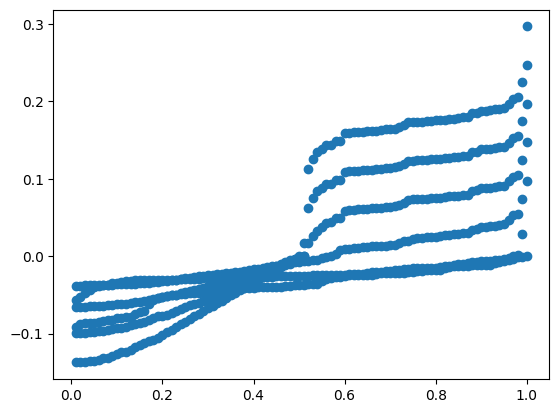

In [4]:
plt.scatter("p", "CVaR", data = results)